In [86]:
import os

import keras
import tensorflow as tf
from tensorflow import lite
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [87]:
# 저장된 JSON 파일로 부터 모델 로드하기
json_file = open("model/model01.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# 로드한 모델에 Weight 로드하기
keras_file="weight/garbage01.h5"
loaded_model.load_weights (keras_file)

# 로드한 모델 컴파일
loaded_model.compile(loss = "categorical_crossentropy", optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])
    
img=image.load_img("test_img/vodka_303.jpg",target_size=(300,300))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

# 예측
sonuc = loaded_model.predict(images, batch_size=10)
a=np.argmax(sonuc)

In [88]:
# 특정 이미지 test

img=image.load_img("test_img/vodka_303.jpg",target_size=(300,300))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
    
preds = loaded_model.predict(images)
print(preds)

if a==0:
    print("cardboard")
if a==1:
    print("glass")
if a==2:
    print("metal")
if a==3:
    print("paper")
if a==4:
    print("plastic")
if a==5:
    print("trash")

[[0. 1. 0. 0. 0. 0.]]
glass


Found 4453 images belonging to 6 classes.
Found 491 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


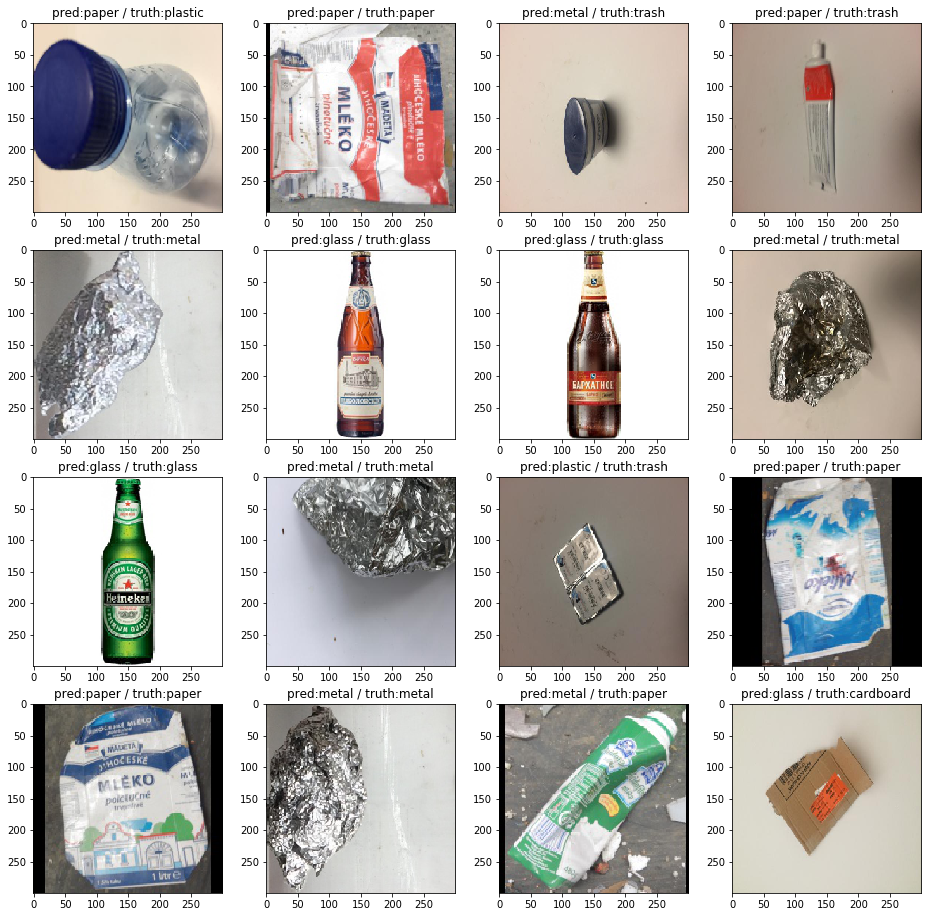

In [89]:
# 랜덤이미지 test - 그래프,표 이용

base_path = 'dataset/training'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

test_x, test_y = validation_generator.__getitem__(1)

preds = loaded_model.predict(test_x)


plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))

    plt.imshow(test_x[i])